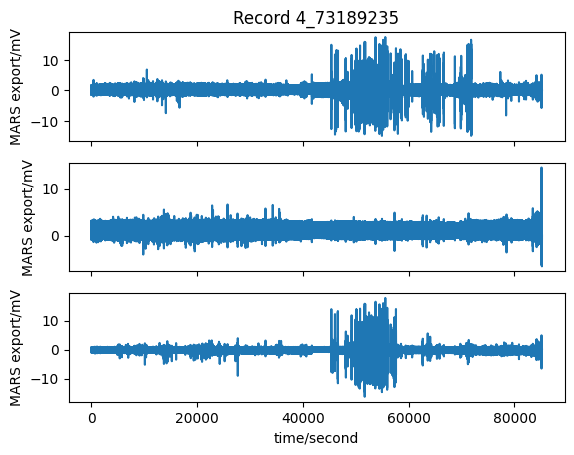

In [2]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt

# 레코드를 읽기
record = wfdb.rdrecord('C:\\Users\\SNUH\\Desktop\\export\\4_73189235')

# 해당 레코드의 플롯 그리기
wfdb.plot.plot_wfdb(record=record, title='Record 4_73189235')


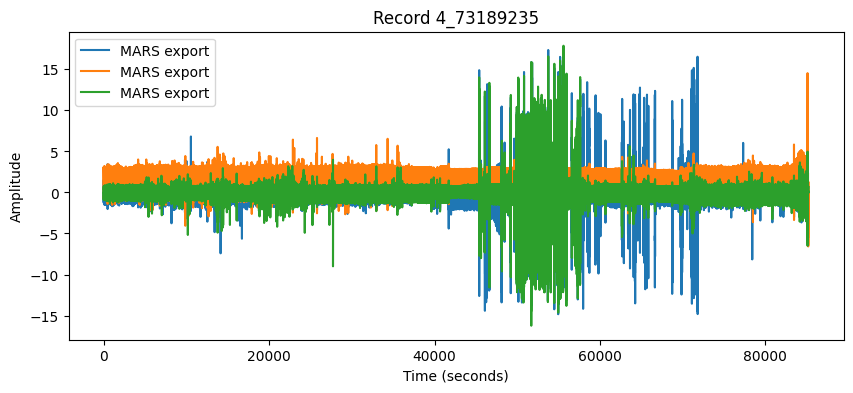

,MARS export,MARS export,MARS export
0,0.06,-0.08,0.02
1,0.06,-0.06,0.02
2,0.04,-0.06,0.02
3,0.04,-0.06,0.00
4,0.04,-0.06,0.00
5,0.04,-0.08,0.00
6,0.04,-0.08,-0.02
7,0.02,-0.12,-0.06
8,0.08,-0.16,0.00
9,0.14,-0.14,0.04


In [3]:
# 시간 벡터 생성
time = [i / record.fs for i in range(record.sig_len)]

# 플롯 생성
plt.figure(figsize=(10, 4))
for i in range(record.n_sig):
    plt.plot(time, record.p_signal[:, i], label=record.sig_name[i])
plt.legend()
plt.title('Record 4_73189235')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# 레코드 데이터를 DataFrame으로 변환
df = pd.DataFrame(record.p_signal, columns=record.sig_name)
df.head(10)

In [4]:
# Transpose the DataFrame so columns represent channels
df_transposed = df.T

# Convert transposed DataFrame to XML
xml_elements = []
for channel, values in enumerate(df_transposed.values, start=1):
    signal_data = ','.join(map(str, values))
    xml_elements.append(f'<WaveformData lead="{channel}">{signal_data}</WaveformData>')

# Combine all XML elements
xml_string = "<data>\n" + "\n".join(xml_elements) + "\n</data>"

# Define the file path where you want to save the XML
xml_file_path = 'C:\\Users\\SNUH\\Desktop\\export\\4_73189235.xml'

# Write the XML string to the file
with open(xml_file_path, 'w', encoding='utf-8') as xml_file:
    xml_file.write(xml_string)

print(f"XML file has been saved to {xml_file_path}")

XML file has been saved to C:\Users\SNUH\Desktop\export\4_73189235.xml
